In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4'], dtype='object')

In [4]:
df_min=df[df['4']==1]

In [5]:
df_min.to_csv('iris0_minority_train.csv',index=False)
df_min=pd.read_csv('iris0_minority_train.csv')

In [6]:
df_majority=df[df['4']==0]
df_majority.to_csv('iris0_majority_train.csv',index=False)
df_majority=pd.read_csv('iris0_majority_train.csv')

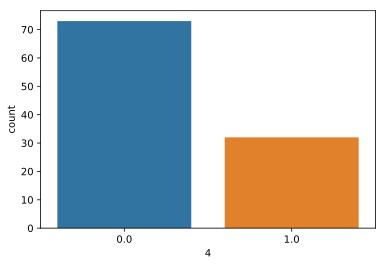

In [7]:
%matplotlib inline
sns.countplot(x='4',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(26, 5, 5)
(26, 5)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(5))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
Total params: 2,185
Trainable params: 2,185
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
15/15 [==============================] - 3s 204ms/step - loss: 0.2245
Epoch 2/500
15/15 [==============================] - 0s 1ms/step - loss: 0.2191
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2130
Epoch 4/500
15/15 [==============================] - 0s 1ms/step - loss: 0.2068
Epoch 5/500
15/15 [==============================] - 0s 1ms/step - loss: 0.2005
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1943
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1882
Epoch 8/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1822
Epoch 9/500
15/15 [==============================] - 0s 1ms/step - loss: 0.1764
Epoch 10/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1707
Epoch 11/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1651
Epoch 12/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1596
Epoch 13/500
15/15 [===============

Epoch 103/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0384
Epoch 104/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0384
Epoch 105/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0383
Epoch 106/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0383
Epoch 107/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0383
Epoch 108/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0382
Epoch 109/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0382
Epoch 110/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0381
Epoch 111/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0381
Epoch 112/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0381
Epoch 113/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 114/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 115/500
15

Epoch 203/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 204/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 205/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 206/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0343
Epoch 207/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0343
Epoch 208/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0342
Epoch 209/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0342
Epoch 210/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0342
Epoch 211/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 212/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 213/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0340
Epoch 214/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0340
Epoch 215/500
15

Epoch 303/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0287
Epoch 304/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0286
Epoch 305/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 306/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 307/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0284
Epoch 308/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 309/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0282
Epoch 310/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0281
Epoch 311/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 312/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 313/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0278
Epoch 314/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 315/500
15

Epoch 403/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0175
Epoch 404/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 405/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 406/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 407/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0171
Epoch 408/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 409/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 410/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 411/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 412/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0165
Epoch 413/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0164
Epoch 414/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 415/500
15

In [14]:
model.save('7-24-2019-iris0-v1.h5')

In [15]:
Xtrain.shape

(15, 5, 5)

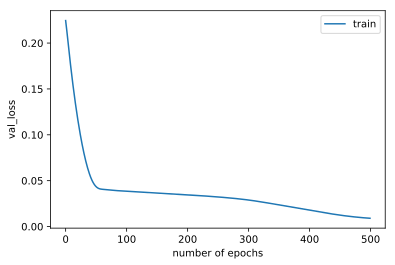

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

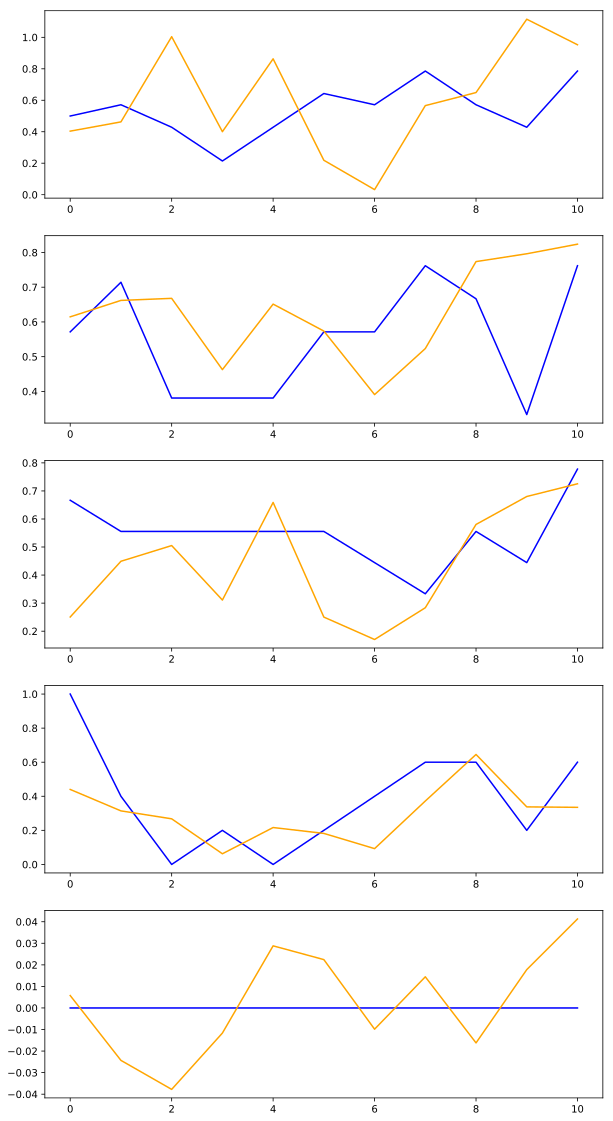

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 0.40388834,  0.61474216,  0.25057364,  0.44007903,  0.00575856],
       [ 0.46268776,  0.6620249 ,  0.44925544,  0.31428227, -0.02432669],
       [ 1.0039455 ,  0.66797394,  0.50521505,  0.267685  , -0.03777614],
       [ 0.4004298 ,  0.46273798,  0.31099978,  0.0626346 , -0.01165248],
       [ 0.86325544,  0.6513714 ,  0.6588905 ,  0.21660683,  0.02881095],
       [ 0.21871449,  0.57377523,  0.25022244,  0.18208326,  0.0224297 ],
       [ 0.03222933,  0.39084804,  0.17036086,  0.09278749, -0.0098433 ],
       [ 0.5660486 ,  0.52340555,  0.28359634,  0.37221265,  0.01445053],
       [ 0.6490827 ,  0.77379656,  0.58047974,  0.6453621 , -0.01621133],
       [ 1.114965  ,  0.79635066,  0.68008375,  0.3377967 ,  0.01778273],
       [ 0.9526625 ,  0.82400167,  0.7254648 ,  0.3351239 ,  0.04128252]],
      dtype=float32)

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

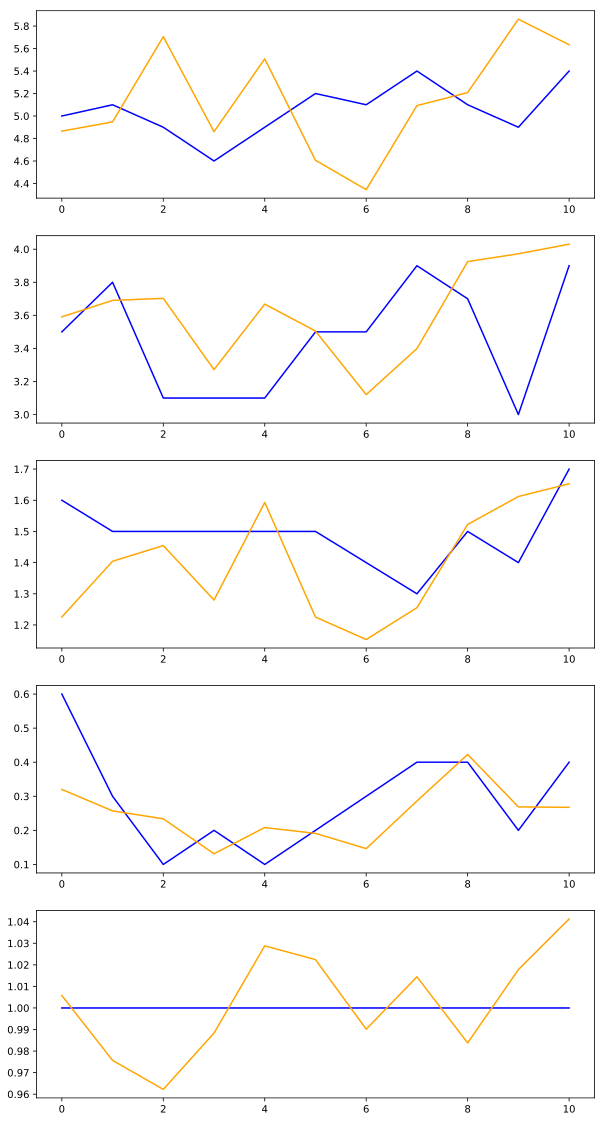

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 0.40388834,  0.61474216,  0.25057364,  0.44007903,  0.00575856],
       [ 0.46268776,  0.6620249 ,  0.44925544,  0.31428227, -0.02432669],
       [ 1.0039455 ,  0.66797394,  0.50521505,  0.267685  , -0.03777614],
       [ 0.4004298 ,  0.46273798,  0.31099978,  0.0626346 , -0.01165248],
       [ 0.86325544,  0.6513714 ,  0.6588905 ,  0.21660683,  0.02881095],
       [ 0.21871449,  0.57377523,  0.25022244,  0.18208326,  0.0224297 ],
       [ 0.03222933,  0.39084804,  0.17036086,  0.09278749, -0.0098433 ],
       [ 0.5660486 ,  0.52340555,  0.28359634,  0.37221265,  0.01445053],
       [ 0.6490827 ,  0.77379656,  0.58047974,  0.6453621 , -0.01621133],
       [ 1.114965  ,  0.79635066,  0.68008375,  0.3377967 ,  0.01778273],
       [ 0.9526625 ,  0.82400167,  0.7254648 ,  0.3351239 ,  0.04128252]],
      dtype=float32)

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)